In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [22]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']


In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [29]:
# ✅ Use LabelEncoder for 'Sex'
le = LabelEncoder()
X.loc[:, 'Sex'] = le.fit_transform(X['Sex'])

"""X.loc[:, 'Sex'] means:

: — All rows

'Sex' — Only the 'Sex' column

So this selects all rows in the 'Sex' column.
You are overwriting them with the transformed values.

----------------------------------------------------------------------------------

# Access all rows in 'Age' column (by label)
X.loc[:, 'Age']

# Access first 5 rows of 3rd column (by index)
X.iloc[0:5, 2]    index - 0,1,2"""

"X.loc[:, 'Sex'] means:\n\n: — All rows\n\n'Sex' — Only the 'Sex' column\n\nSo this selects all rows in the 'Sex' column.\nYou are overwriting them with the transformed values.\n\n----------------------------------------------------------------------------------\n\n# Access all rows in 'Age' column (by label)\nX.loc[:, 'Age']\n\n# Access first 5 rows of 3rd column (by index)\nX.iloc[0:5, 2]    index - 0,1,2"

In [30]:
# ✅ Handle missing Age values
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

In [31]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Total trees trained
print(len(rf_classifier.estimators_))  # Should be 100 if n_estimators=100

# Check individual tree
tree = rf_classifier.estimators_[0]
print(tree)

# 16 --> sqrt(16) -- 4

100
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


In [37]:
print(rf_classifier.feature_importances_)

[0.07783088 0.2712546  0.26002009 0.0495455  0.03679038 0.30455855]


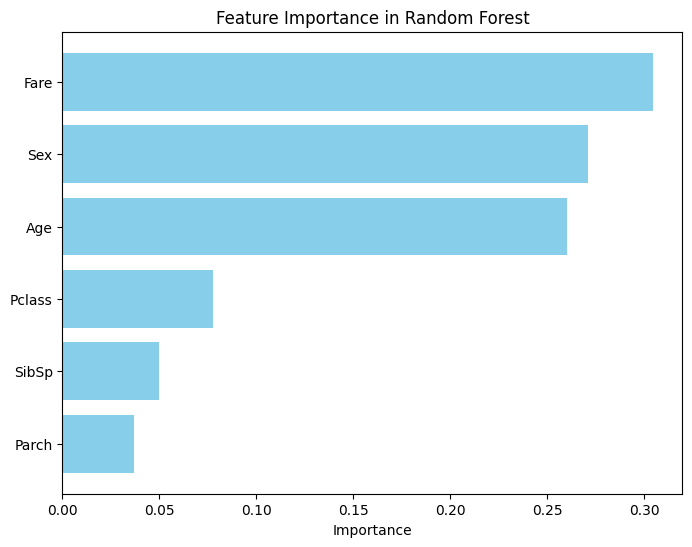

In [38]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [39]:
feat_imp.head()

,Feature,Importance
5,Fare,0.304559
1,Sex,0.271255
2,Age,0.260020
0,Pclass,0.077831
3,SibSp,0.049545


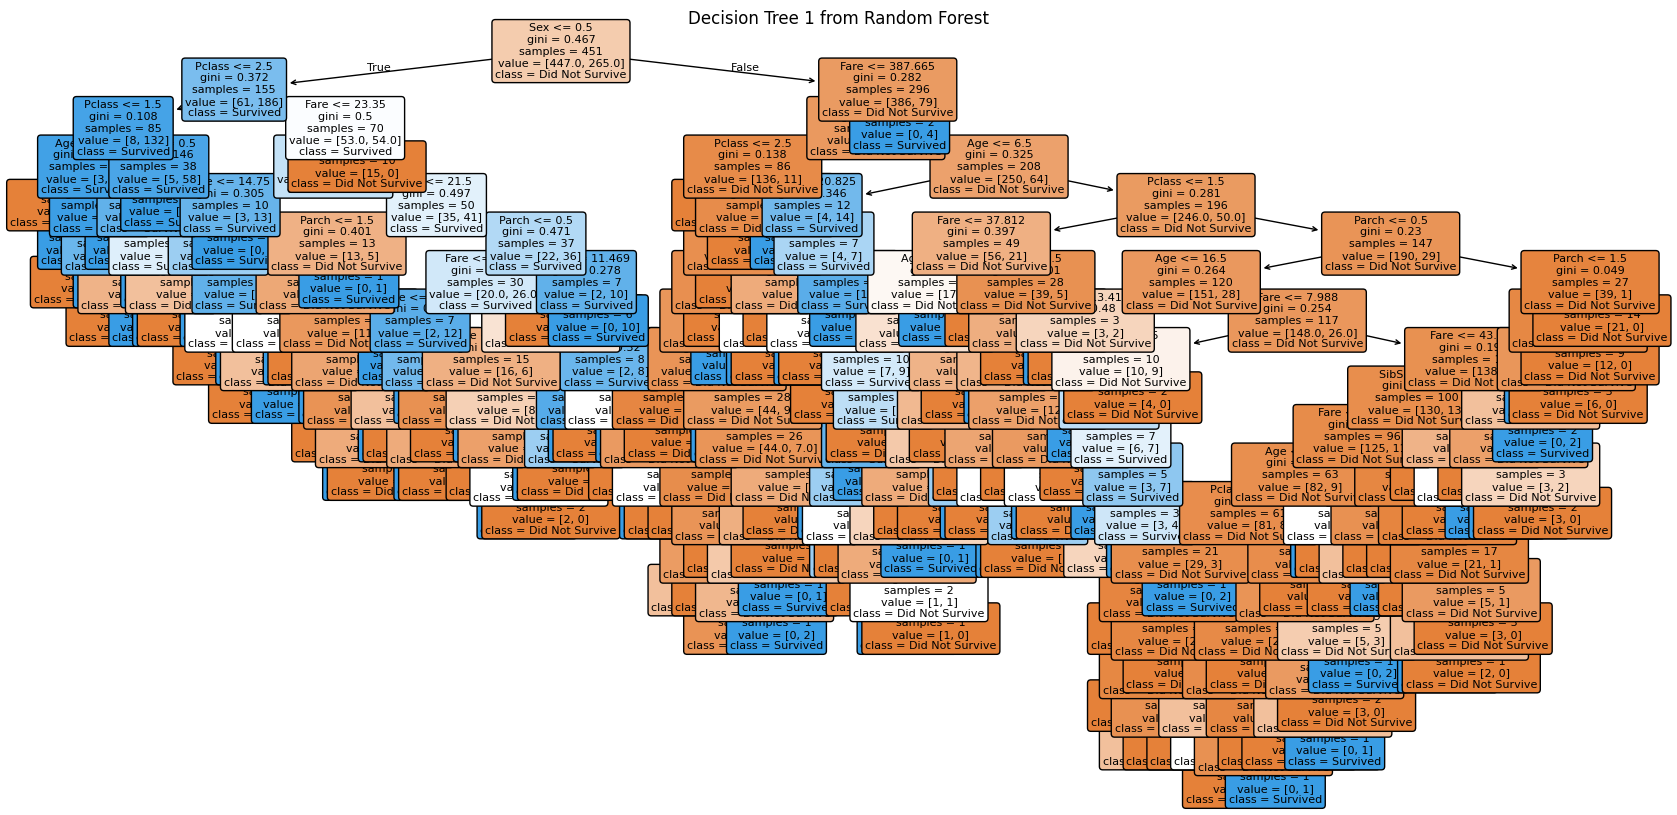

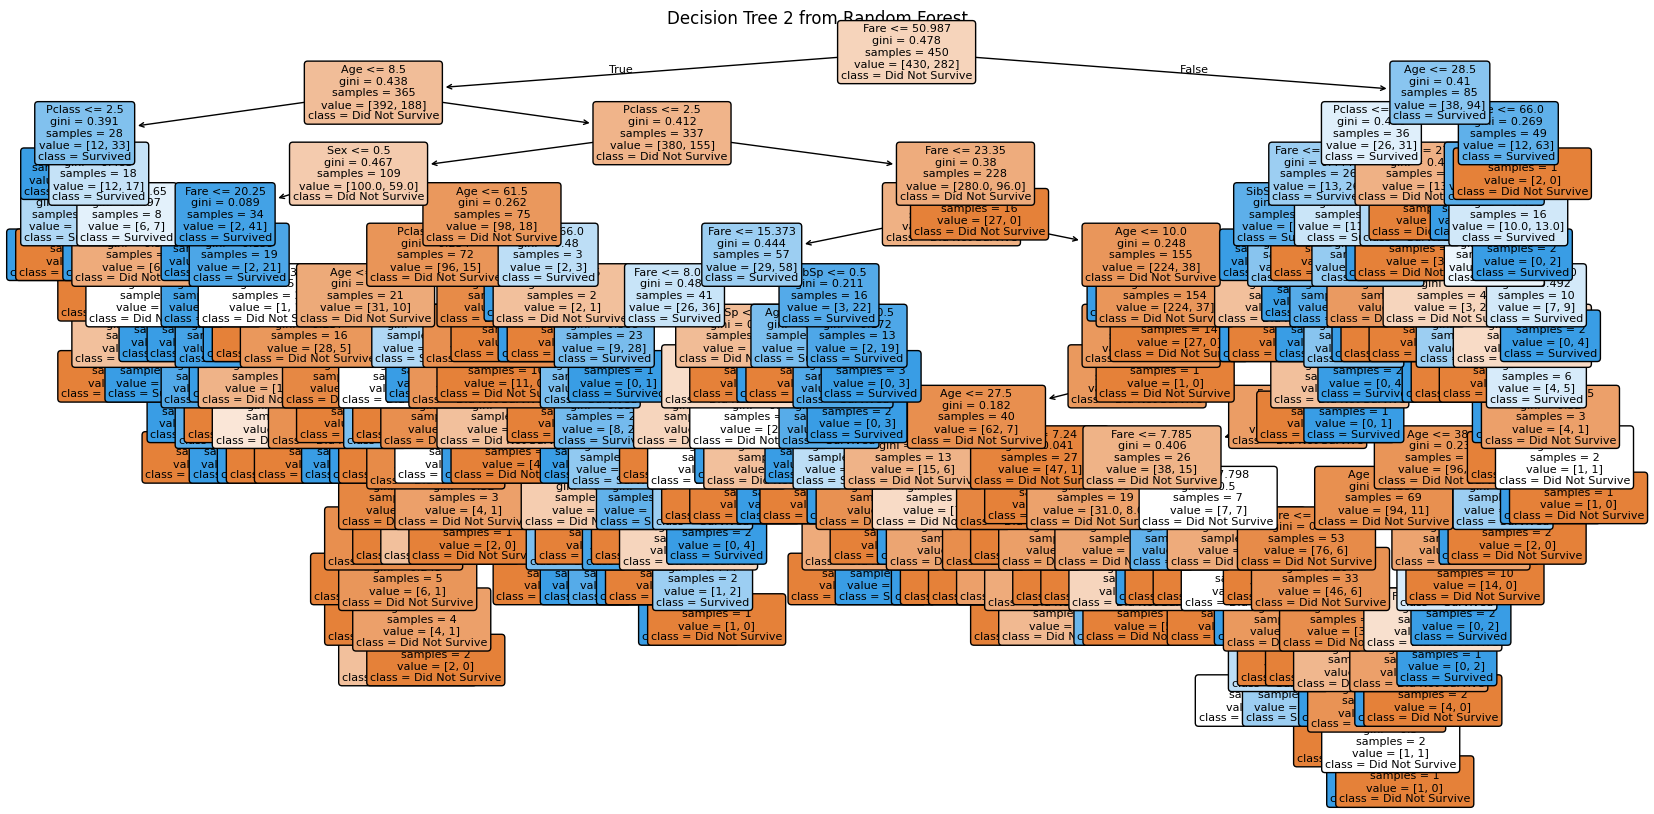

In [40]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=X.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 1 from Random Forest")
plt.show()

# Plot the second tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[1], 
          feature_names=X.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 2 from Random Forest")
plt.show()


In [41]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 28.0, 'SibSp': 1.0, 'Parch': 1.0, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


In [42]:
sample.to_dict()

{'Pclass': {709: 3},
 'Sex': {709: 1},
 'Age': {709: 28.0},
 'SibSp': {709: 1},
 'Parch': {709: 1},
 'Fare': {709: 15.2458}}

In [ ]:
sample_dict_sam = sample.to_dict()
print(sample_dict_sam)